In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# K-means
This notebook will cover the essential parts of the k-means algorithm. Particularly, we will explore a barebones implementation of k-means, then show you how to use the sklearn Kmeans package to do the same

Adapted from Chris Piech's handout on kmeans

[Source]( http://stanford.edu/~cpiech/cs221/handouts/kmeans.html)


In [2]:
def getRandomCentroids(X, k):
    """Returns a k subset of random centroids to initialize the algorithm"""
    centroids = X.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [3]:
def getLabels(points, centroids):
    """
    For each element in the dataset, chose the closest centroid. 
    Make that centroid the element's label.
    distances = np.linalg.norm(points - centroids[:,np.newaxis])
    
    Returns a label for each piece of data in the dataset. 
    """
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [4]:
def newCentroids(points, closest, k):
    """Calculates the new k random clusters
    Each centroid is the geometric mean of the points that
    have that centroid's label. Important: If a centroid is empty (no points have
    that centroid's label) you should randomly re-initialize it."""
    clustered_points = []
    for label in range(k):
        clustered_points.append(points[closest==label].mean(axis=0))
    
    return np.array(clustered_points)

In [5]:
def shouldStop(oldCentroids, centroids, iterations):
    """Returns True or False if k-means is done. K-means terminates either
    because it has run a maximum number of iterations OR the centroids
    stop changing.
    """
    if iterations > MAX_ITERATIONS: return True
    return np.equal(oldCentroids, centroids).all()

In [6]:
MAX_ITERATIONS = 10

def kmeans(dataSet, k):
    """K-Means is an algorithm that takes in a dataset and a constant
    k and returns k centroids (which define clusters of data in the
    dataset which are similar to one another)."""
    # Initialize centroids randomly
    numFeatures = dataSet.shape[1]
    centroids = getRandomCentroids(dataSet, k)
    
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = None
    
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids)
        
        # Assign centroids based on datapoint labels
        centroids = newCentroids(dataSet, labels, k)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids, labels

Set up plotting. Copied from [sklearn kmeans example](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

In [7]:
def plotKmeans(points, labels):
    """ Take in the datapoints and the labels for each point, then 
    plots index 0, 2, and 3 elements of the data vector in a 3d plot.
    This is specifically engineered for the Iris dataset."""
    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
#     est.fit(X)
#     labels = est.labels_

    ax.scatter(points[:, 3], points[:, 0], points[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()

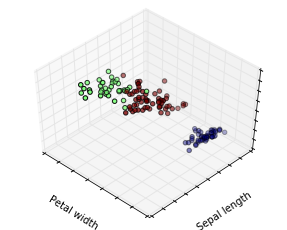

In [8]:
# load the dataset
from sklearn import datasets
# uncomment if you want a guaranteed non-local minima
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target
k = 3
centroids, labels = kmeans(X, k)
plotKmeans(X, labels)

## Ground truth 
Plotting with the original labels

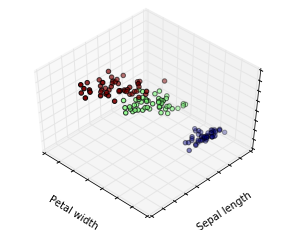

In [9]:
plotKmeans(X,y)

## The SKlearn way

In [10]:
from sklearn.cluster import KMeans

In [11]:
estimator = KMeans(n_clusters=3, max_iter =10)
estimator.fit(X)
labels = estimator.labels_ # same as output for labels
centers = estimator.cluster_centers_

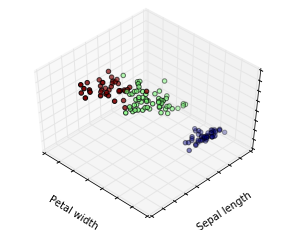

In [12]:
plotKmeans(X, labels)

In [13]:
# the centroids from sklearn kmeans
centers

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [14]:
# centroids from our implementation
centroids

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]])